<a href="https://colab.research.google.com/github/Naman1232/ML-PROJECTS/blob/main/Stock_Market_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [4]:
import yfinance as yf
start='2013-01-01'
end='2023-12-31'
df=yf.download('AAPL',start=start,end=end)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,19.779285,19.821428,19.343929,19.608213,16.705696,560518000
2013-01-03,19.567142,19.631071,19.321428,19.360714,16.494841,352965200
2013-01-04,19.177500,19.236786,18.779642,18.821428,16.035378,594333600
2013-01-07,18.642857,18.903570,18.400000,18.710714,15.941049,484156400
2013-01-08,18.900356,18.996071,18.616072,18.761070,15.983962,458707200


In [5]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-22,195.179993,195.410004,192.970001,193.600006,192.868134,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.320221,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.419830,48087700
2023-12-28,194.139999,194.660004,193.169998,193.580002,192.848221,34049900
2023-12-29,193.899994,194.399994,191.729996,192.529999,191.802185,42628800


In [6]:
df=df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,19.779285,19.821428,19.343929,19.608213,16.705696,560518000
1,2013-01-03,19.567142,19.631071,19.321428,19.360714,16.494841,352965200
2,2013-01-04,19.177500,19.236786,18.779642,18.821428,16.035378,594333600
3,2013-01-07,18.642857,18.903570,18.400000,18.710714,15.941049,484156400
4,2013-01-08,18.900356,18.996071,18.616072,18.761070,15.983962,458707200


In [7]:
df=df.drop(['Date','Adj Close'],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,19.779285,19.821428,19.343929,19.608213,560518000
1,19.567142,19.631071,19.321428,19.360714,352965200
2,19.177500,19.236786,18.779642,18.821428,594333600
3,18.642857,18.903570,18.400000,18.710714,484156400
4,18.900356,18.996071,18.616072,18.761070,458707200


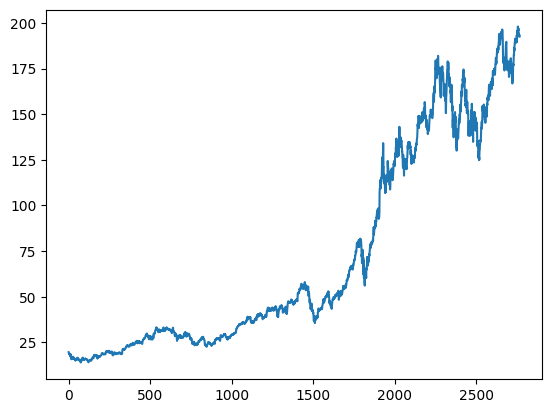

In [8]:
plt.plot(df.Close)

In [9]:
ma100=df.Close.rolling(100).mean()
ma100

,Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2763,181.768301
2764,181.787101
2765,181.898701
2766,182.046001


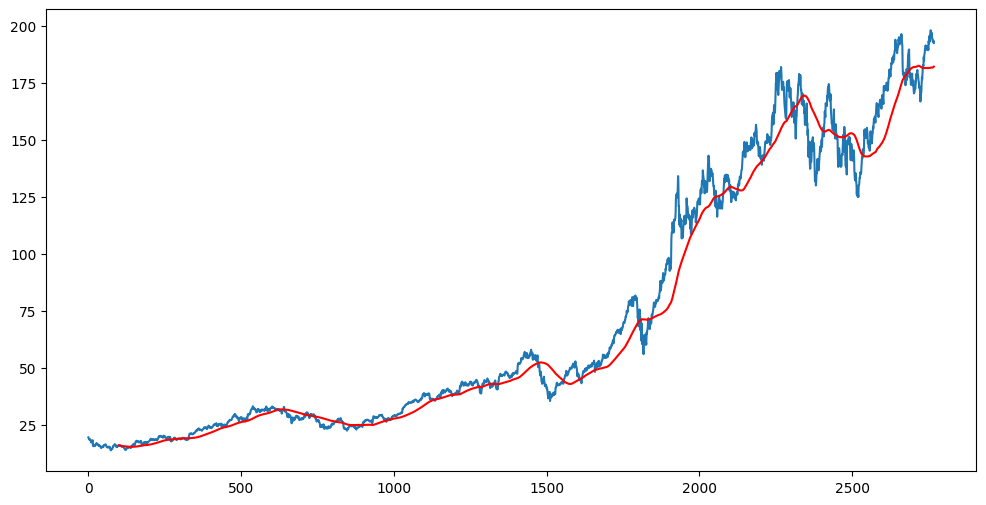

In [10]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [11]:
ma200=df.Close.rolling(200).mean()
ma200

,Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2763,178.649100
2764,178.871851
2765,179.085250
2766,179.290201


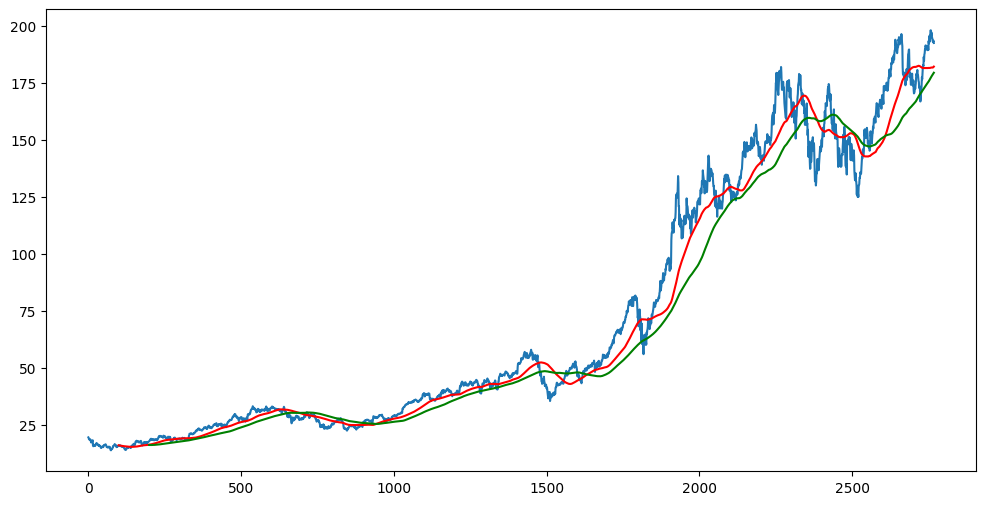

In [13]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [14]:
df.shape

(2768, 5)

In [15]:
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1937, 1)
(831, 1)


In [17]:
data_training.head()

,Close
0,19.608213
1,19.360714
2,18.821428
3,18.710714
4,18.761070


In [18]:
data_testing.head()

,Close
1937,112.000000
1938,115.360001
1939,115.540001
1940,112.129997
1941,110.339996


In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [20]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.04708139],
       [0.04502289],
       [0.04053753],
       ...,
       [0.82234426],
       [0.85977174],
       [0.82791678]])

In [22]:
x_train=[]
y_train=[]
for i in range(100,data_training_array.shape[0]):
  x_train.append(data_training_array[i-100:i])
  y_train.append(data_training_array[i,0])
x_train,y_train=np.array(x_train),np.array(y_train)

In [23]:
from tensorflow import keras
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential


In [25]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [26]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 23s 283ms/step - loss: 0.0247
Epoch 2/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 17s 285ms/step - loss: 0.0047
Epoch 3/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 22s 308ms/step - loss: 0.0026
Epoch 4/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 20s 308ms/step - loss: 0.0033
Epoch 5/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 20s 301ms/step - loss: 0.0026
Epoch 6/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 18s 302ms/step - loss: 0.0027
Epoch 7/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 20s 294ms/step - loss: 0.0026
Epoch 8/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 22s 323ms/step - loss: 0.0019
Epoch 9/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 18s 291ms/step - loss: 0.0019
Epoch 10/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 21s 304ms/step - loss: 0.0017
Epoch 11/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 20s 293ms/step - loss: 0.0017
Epoch 12/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 21s 301ms/step - loss: 0.0017
Epoch 13/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 20s 290ms/step - loss: 0.0016
Epoch 14/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 21s 306ms/step - loss: 0.0017
Epoch 15/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 19s 

In [28]:
model.save('keras_model.h5')

In [29]:
data_testing.head()

,Close
1937,112.000000
1938,115.360001
1939,115.540001
1940,112.129997
1941,110.339996


In [30]:
data_training.tail()

,Close
1932,120.879997
1933,120.959999
1934,112.820000
1935,117.320000
1936,113.489998


In [31]:
past_100_days=data_training.tail(100)

In [33]:
final_df=pd.concat([past_100_days,data_testing],ignore_index=True)

In [34]:
final_df.head()

,Close
0,67.092499
1,69.025002
2,68.757500
3,70.742500
4,70.792503


In [35]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.        ],
       [0.01474996],
       [0.01270823],
       [0.02785889],
       [0.02824054],
       [0.01948211],
       [0.03694166],
       [0.04852404],
       [0.03949856],
       [0.04730286],
       [0.05569867],
       [0.06155668],
       [0.06749097],
       [0.07968403],
       [0.08899577],
       [0.08212645],
       [0.07495182],
       [0.07855823],
       [0.0750663 ],
       [0.08890033],
       [0.08542756],
       [0.09704813],
       [0.09250675],
       [0.09639937],
       [0.09227778],
       [0.09491097],
       [0.09517813],
       [0.09458661],
       [0.10204746],
       [0.10489057],
       [0.10828706],
       [0.10294429],
       [0.12046101],
       [0.12420096],
       [0.14429369],
       [0.16118076],
       [0.12885683],
       [0.13439043],
       [0.14238555],
       [0.15973055],
       [0.15879558],
       [0.15906275],
       [0.15522736],
       [0.17268685],
       [0.18730323],
       [0.17495755],
       [0.18407846],
       [0.162

In [37]:
input_data.shape

(931, 1)

In [38]:
x_test=[]
y_test=[]
for i in range(100,input_data.shape[0]):
  x_test.append(input_data[i-100:i])
  y_test.append(input_data[i,0])

In [39]:
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(831, 100, 1)
(831,)


In [40]:
y_predicted=model.predict(x_test)

26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 145ms/step


In [41]:
y_predicted

array([[0.42943555],
       [0.41946766],
       [0.40775836],
       [0.39555448],
       [0.38356322],
       [0.37208623],
       [0.36100227],
       [0.35053784],
       [0.34116763],
       [0.33286703],
       [0.32561868],
       [0.31977957],
       [0.31586593],
       [0.3141508 ],
       [0.31473005],
       [0.31749055],
       [0.32168186],
       [0.32684144],
       [0.33219987],
       [0.33732855],
       [0.34196955],
       [0.3462035 ],
       [0.35083032],
       [0.3561803 ],
       [0.3622207 ],
       [0.36864436],
       [0.3748352 ],
       [0.37984824],
       [0.38327897],
       [0.385028  ],
       [0.38511756],
       [0.38367903],
       [0.38098624],
       [0.37759912],
       [0.37341493],
       [0.36886382],
       [0.36370534],
       [0.35779947],
       [0.3513925 ],
       [0.34530538],
       [0.34064168],
       [0.33815637],
       [0.33787787],
       [0.33939844],
       [0.34251052],
       [0.34692383],
       [0.3522619 ],
       [0.358

In [42]:
scaler.scale_

array([0.00763257])

In [43]:
scale_factor=1/0.00763257
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

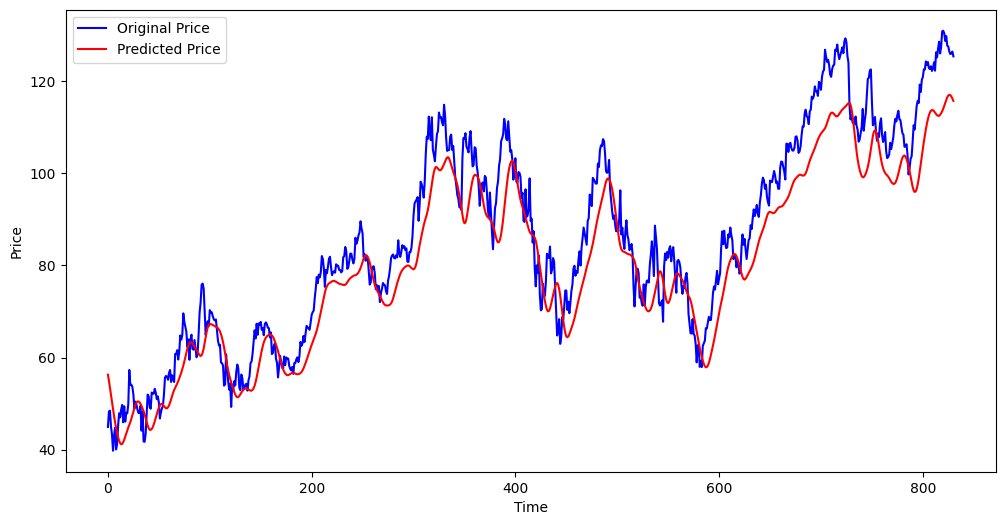

In [44]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()